In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Raw Data

In [ ]:
df = pd.read_csv("../data/raw/raw_MC.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Understanding Data

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Checking for Null Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No **null values** found in any column!

# Cleaning Data

In [ ]:
df_cleaned = df.copy().drop(['sex','children','smoker','region'],axis=1)
df_cleaned

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


The columns 'sex', 'children', 'smoker', and 'region' were removed from the dataset because my research question solely focuses on the relationship between age, BMI and the charges of medical insurance. This helps in localising the focus of thhe research question and having onyl the required data to handle.

## Removing outliers

In [ ]:
df_cleaned = df_cleaned[df_cleaned['age'].between(20,40)]
df_cleaned = df_cleaned.sort_values(by='age')
df_cleaned

,age,bmi,charges
105,20,28.025,17560.37975
210,20,33.000,1980.07000
1042,20,30.685,33475.81715
1252,20,27.300,16232.84700
166,20,37.000,4830.63000
...,...,...,...
448,40,29.600,5910.94400
1198,40,29.355,6393.60345
687,40,41.690,5438.74910
806,40,41.420,28476.73499


By removing outliers, I have conslidated my data parallel to my research question, focusing only on the people aged between 20 and 40.

In [ ]:
df_cleaned.describe()

,age,bmi,charges
count,564.000000,564.000000,564.000000
mean,29.746454,30.103138,10659.589696
std,6.063422,6.141325,11590.513886
min,20.000000,16.815000,1391.528700
25%,24.750000,25.900000,3558.195763
50%,30.000000,29.767500,5259.488700
75%,35.000000,34.100000,16162.283287
max,40.000000,52.580000,58571.074480


# Visualising Data and Finding Relationships

### BMI and Charges against Age

<seaborn.axisgrid.FacetGrid>

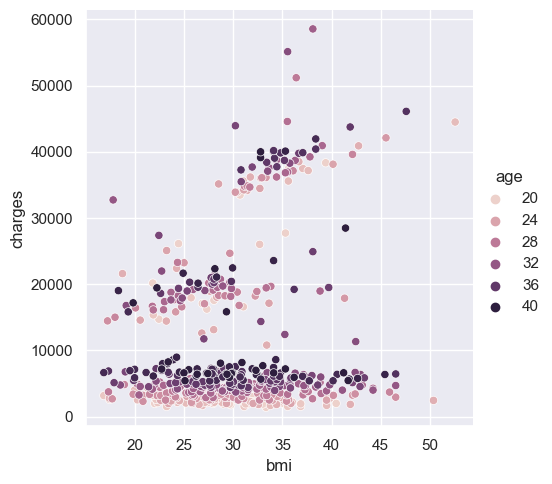

In [ ]:
sns.relplot(data=df_cleaned,x='bmi',y='charges',hue='age')

It can be observed that, in most cases, the charges remain constant even withh increase in BMI.

### BMI and Age against Charges

<seaborn.axisgrid.FacetGrid>

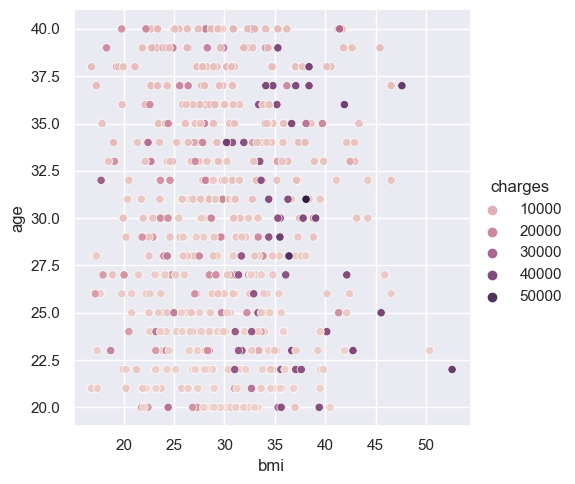

In [ ]:
sns.relplot(data=df_cleaned,x='bmi',y='age',hue='charges')

It can be observed that charges remain constant, in most cases, with increase in age, regardless of any changes in BMI.

### Age and Charges against BMI

<seaborn.axisgrid.FacetGrid>

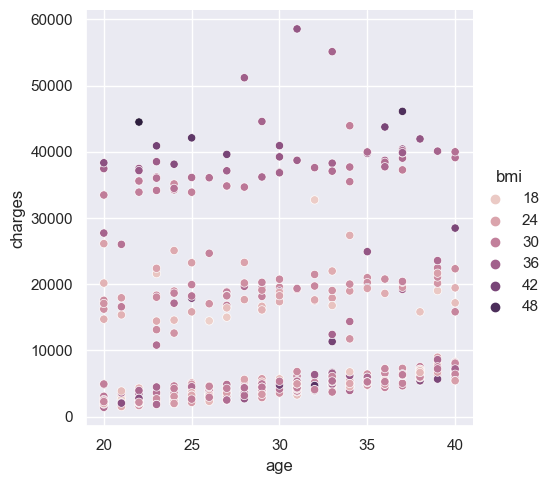

In [ ]:
sns.relplot(data=df_cleaned,x='age',y='charges',hue='bmi')

It can be observed that bmi remains constant with increase in age, although increase in BMI does not necessarily increase charges.

# Method Chaining

In [ ]:
df = pd.read_csv("../data/raw/raw_MC.csv")

df1 = (
    pd.DataFrame(df)
    .copy().drop(['sex','children','smoker','region'],axis=1)
)

df1

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


In [ ]:
df2 = (
    pd.DataFrame(df1)
    .loc[lambda x: x['age']>19]
    .loc[lambda x: x['age']<41]
)

df2

,age,bmi,charges
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
5,31,25.740,3756.62160
7,37,27.740,7281.50560
...,...,...,...
1320,31,31.065,5425.02335
1324,31,25.935,4239.89265
1328,23,24.225,22395.74424
1331,23,33.400,10795.93733


In [ ]:
df3 = (
    pd.DataFrame(df2)
    .sort_values(by='age')
)

df3

,age,bmi,charges
105,20,28.025,17560.37975
210,20,33.000,1980.07000
1042,20,30.685,33475.81715
1252,20,27.300,16232.84700
166,20,37.000,4830.63000
...,...,...,...
448,40,29.600,5910.94400
1198,40,29.355,6393.60345
687,40,41.690,5438.74910
806,40,41.420,28476.73499


This is the required data that I would like to analyse for my research question.
Plot 1: The plot here shows that charges remain constant even with increase in BMI, in most cases.
Plot 2: The plot here shows that charges remain constant with increase in age, regardless of any changes in BMI.
Plot 3: The plot here shows that BMI remains constant with increase in age, although increase in BMI does not necessarily increase charges.


,age,bmi,charges
105,20,28.025,17560.37975
210,20,33.000,1980.07000
1042,20,30.685,33475.81715
1252,20,27.300,16232.84700
166,20,37.000,4830.63000
...,...,...,...
448,40,29.600,5910.94400
1198,40,29.355,6393.60345
687,40,41.690,5438.74910
806,40,41.420,28476.73499


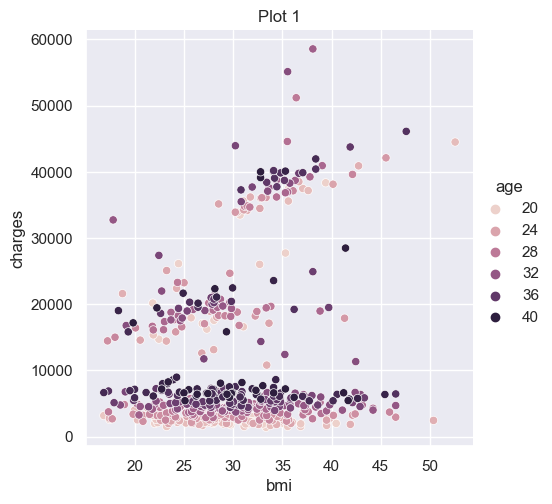

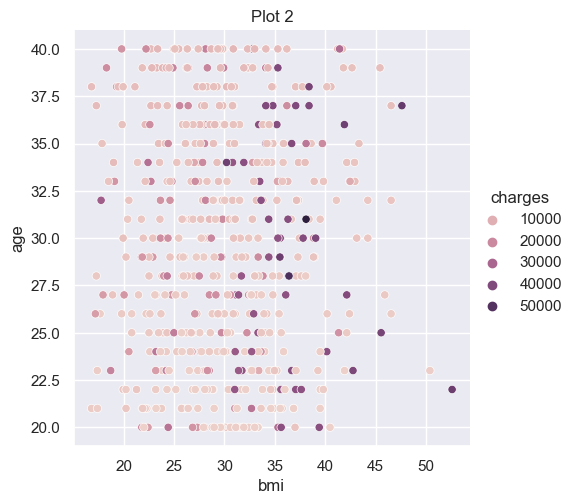

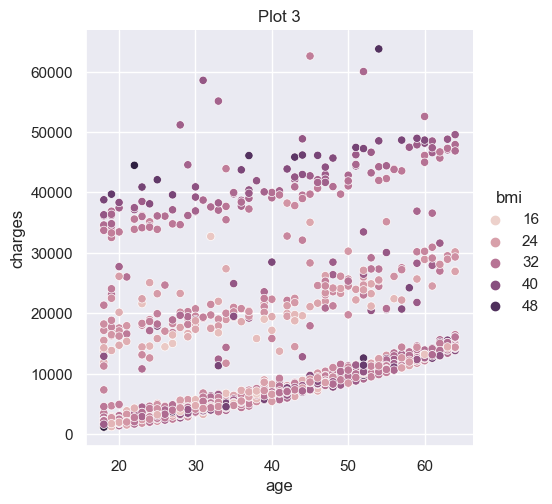

In [ ]:
def load_and_process(df):
    
    # Method Chain 1 (load data and drop unwanted columns)
    
    df1 = (
        pd.DataFrame(df)
        .copy().drop(['sex','children','smoker','region'],axis=1)
    )
    
    # Method Chain 2 (localise data)
    
    df2 = (
        pd.DataFrame(df1)
        .loc[lambda x: x['age']>19]
        .loc[lambda x: x['age']<41]
    )
    
    # Method Chain 3 (sorting data)
    
    df3 = (
        pd.DataFrame(df2)
        .sort_values(by='age')
    )
    
    print(f"This is the required data that I would like to analyse for my research question.")
    
    # A few plots to help visualise the data better.
    
    sns.relplot(data=df3,x='bmi',y='charges',hue='age')
    plt.title('Plot 1')
    print(f"Plot 1: The plot here shows that charges remain constant even with increase in BMI, in most cases.")
    
    sns.relplot(data=df3,x='bmi',y='age',hue='charges')
    plt.title('Plot 2')
    print(f"Plot 2: The plot here shows that charges remain constant with increase in age, regardless of any changes in BMI.")
    
    sns.relplot(data=df,x='age',y='charges',hue='bmi')
    plt.title('Plot 3')
    print(f"Plot 3: The plot here shows that BMI remains constant with increase in age, although increase in BMI does not necessarily increase charges.")
    
    return df3

load_and_process(df)

In [ ]:
import project_functions2 as p2
clean_data = p2.load_and_process("..data/raw/raw_MC.csv")
clean_data

AttributeError: module 'project_functions2' has no attribute 'load_and_process'